In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp 'drive/MyDrive/Colab Notebooks/Basic-principles-nn-pythorch/plot_functin.py' .

<div dir="rtl" lang="he" xml:lang="he">

# בניית רשת נויירונים

בניית רשת נויירונים היא תהליך המורכב משלוש שלבים: 
**א.** 
בניית הרשת ע"י שירשור של שכבות שונות
**ב.** 
אימון הרשת, ע"י שימוש בפונקציית העלות _
_loss function_
ובפונקציית האופטימיזציה 
_opimazer_
**ג.**
 בדיקת הרשת מול מידע שאותו היא לא ראתה בתהליך האימון 




In [4]:
import torch
lin = torch.nn.Linear(10,1)
class NN(torch.nn.Module):
    def __init__(self):
        super(NN,self).__init__()

In [5]:
nn = NN()
print(type(nn))
print(type(lin))

<class '__main__.NN'>
<class 'torch.nn.modules.linear.Linear'>


<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [2]:
import torch
import matplotlib.pyplot as plt
from Tools import plot_3d_model

ModuleNotFoundError: No module named 'matplotlib'

<div dir="rtl" lang="he" xml:lang="he">


## יצירת מודל
מודל הוא שירשור של פונקציות, מורכבות ככול שיהיו, כל שיכבה היא בעצמה מודל?


In [ ]:
import torch

conv_1 = torch.nn.Conv2d(1, 6, 5)
conv_2 = torch.nn.Conv2d(6, 16, 5)
max_pool_1 = torch.nn.MaxPool2d(2)
max_pool_2 = torch.nn.MaxPool2d(2)
linear_1 = torch.nn.Linear(16 * 5 * 5, 120)
linear_2 = torch.nn.Linear(120, 84)
linear_3 = torch.nn.Linear(84, 10)
activate_1 = torch.nn.ReLU()
activate_2 = torch.nn.ReLU()


def model(input_data):
    y = max_pool_1(input_data)
    y = conv_1(y)
    y = max_pool_2(y)
    y = conv_2(y)
    y = linear_1(y)
    y = activate_1(y)
    y = linear_2(y)
    y = activate_2(y)
    y = linear_3(y)
    return y


In [ ]:
x = torch.rand((100, 400, 120))


<div dir="rtl" lang="he" xml:lang="he">

### שכבה ליניארית
שיכבה ליניארית היא פונקציה אפינית 

$$
\\ \text{Lin}:ℝ^i\to ℝ^o
\\ \text{Lin}(x) = Wx+b
$$


ע"מ שהשכבה תיהיה מוגדרת גם על אוסף של וקטורים , כותבים אותה מעט שונה 
$$
\\ \text{Lin}:(ℝ^i)^n\to (ℝ^o)^n
\\ \text{Lin}(x) = xW.T+b  
$$


In [ ]:
lin_layer = torch.nn.Linear(2, 2)

x = torch.rand(10, 2)
print(
    f"""
{x=},
{lin_layer(x)=}
"""
)


In [ ]:
W = lin_layer.weight.data
b = lin_layer.bias.data
print(
    f"""
{x=},
{W=},
{b=},
{x@W.T+b=},
"""
)


<div dir="rtl" lang="he" xml:lang="he">
אפשר לראות כל שיכבה ליניארית כתת מרחב אפיני. 
ב
$R$
זה יראה ככה:

In [ ]:
lin_layer = torch.nn.Linear(2, 1)
cordinnet = [[num, num] for num in range(15)]
x = torch.tensor(cordinnet, dtype=torch.float32)
y = lin_layer(x).detach()
plot_3d_model(lin_layer, x, y)


<div dir="rtl" lang="he" xml:lang="he">

### שיכבת אקטיבציה

שיכבת אקטיבציה היא פונקציה (לא לינארית ע"פ רוב) שמופעלת על הקלט. בדרך כלל נרכיב שיכבה לינארית ושיכבת אקטיבציה ביחד, כך נקבל רשת שיכולה לקרב לא רק פונקציות ליניאריות. (כי הרכבה של פונקציות ליניאריות ליניארית)


In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(15, 15))
plt.setp(axis, xlim=(-3, 3), ylim=(-1.5, 1.5))
activate_functions = {
    "relu": (torch.nn.functional.relu, axis[0][0]),
    "hardtanh": (torch.nn.functional.hardtanh, axis[0][1]),
    "elu": (torch.nn.functional.elu, axis[0][2]),
    "softmax": (lambda x: torch.nn.functional.softmax(x,dim=0), axis[1][0]),
    "log_softmax": (lambda x: torch.nn.functional.log_softmax(x, dim=0), axis[1][1]),
    "tanh": (torch.tanh, axis[1][2]),
    "normalize": (lambda x: torch.nn.functional.normalize(x, dim=0), axis[2][0]),
    "silu": (torch.nn.functional.silu, axis[2][1]),
}
x = torch.linspace(-3, 3, 50)
for label, func_and_ax in activate_functions.items():
    func = func_and_ax[0]
    ax = func_and_ax[1]
    ax.plot(x, func(x).detach(), label=label)
    ax.grid(True)
    ax.legend()


<div dir="rtl" lang="he" xml:lang="he">

### שיכבת הטמעה  Embedding Layer 

שכבת הטמעה לוקחת יצוג של מילה שהוא מספר בודד ומציגה אותו כוקטור מספרים. 
יצוג מאפשר למפות מילים למספרים בצורה יותר חכמה, לדוגמה, מילים דומות יכולות להיות קרובות מבחינה וקטורית

<div dir="rtl" lang="he" xml:lang="he">

#### הפיכת מילים לטוקנים ויצירת אוצר מילים

In [ ]:
from torchtext import vocab
sentence_1 = "הוא הלך לפארק"
sentence_2 = "הם נסעו לבית"
sentence_3 = "אבא ילך לחנות"
sentence_4 = "היא הגיעה לבית-ספר"
sentences = [sentence_1, sentence_2, sentence_3, sentence_4]
words = " ".join(sentences).split()
dictionary = vocab.vocab({words[i]:i+2 for i in range(len(words))})
dictionary.set_default_index(0)


In [ ]:
print(dictionary(sentence_1.split()))
print(dictionary(sentence_4.split()))

In [ ]:
embedding = torch.nn.Embedding(len(words),2)
senten_as_num = torch.tensor(dictionary(sentence_1.split()))
senten_as_vecotr = embedding(senten_as_num)
print(f"""
{senten_as_num=},
{senten_as_vecotr=}
""")

<div dir="rtl" lang="he" xml:lang="he">

#### שכבת הטמעה 
כל מילה שמיוצגת ע"י מספר יחיד תיוצג כעת ע"י וקטור של שני מספרים, כך נוכל למקם מילים קרובות ביחד

In [ ]:
fig,axis = plt.subplots(1)
for word in dictionary.get_stoi():
    word_token = torch.tensor(dictionary([word]))
    word_vector = embedding(word_token).detach()[0]
    axis.scatter(*word_vector,label= word[::-1])   # reverse the word becuase is hebrow
fig.legend(bbox_to_anchor=(1.1, 0.9))

<div dir="rtl" lang="he" xml:lang="he">

### שיכבת קונבולוציה




In [ ]:
conv_layer = torch.nn.Conv1d(1,1,5)
print(conv_layer(torch.ones(1,10,dtype=torch.float32)))

In [ ]:
m = torch.nn.Conv1d(1, 1, 3, stride=2)
input = torch.randn(1, 1, 50)
output = m(input)
print(output)

<div dir="rtl" lang="he" xml:lang="he">

## הרכבת שכבות

<div dir="rtl" lang="he" xml:lang="he">

### שיכבה לינארית ופונקציית אקטיבציה - _Perceptron_

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לזיהוי תמונה

<div dir="rtl" lang="he" xml:lang="he">

### הרכבת שכבות לעוד תפקיד?

<div dir="rtl" lang="he" xml:lang="he">

## יצירת מודל דרך ירושה מ`nn.models`

<div dir="rtl" lang="he" xml:lang="he">

##

In [ ]:
%matplotlib inline

## רשתות נוירונים _Neural network_

כעת כשאנחנו קצת יודעים איך להשתמש ב_autograd_,  נראה איך רשתות נויירונים משתמשות ב_autograd_ בשביל לבנות מודלים ולאמן אותם. כל אובייקט מסוג `nn.Module` מכיל שכבות שונות , ופונקציה `forward(input)` שמקבלת קלט ומחזירה פלט.  

לדוגמה נסתכל על מבנה הרשת הזאת בשם _convnet_ שמיועדת למיין תמונות של ספרות בכתב יד (_calssifies_):

![image.png](attachment:image.png)

זאת רשת פשוטה לחישוב קדימה _feed-forward_  ❗היא מקבלת תמונה כפלט, מעבירה אותה דרך כמה שכבות אחת אחרי השניה ובסוף מדפיסה כפלט איזה ספרה היא זיהתה. 


תהליך האימון הטיפוסי לרשת כזו הוא כדלהלן:  

- מגדירים רשת נוירונים עם משקלים אקראיים ניתנים לשינוי.
- מעבר על מאגר מידע של קלט, וחישוב שלו ברשת
- חישוב הפער בן המידע הנכון למידע שהתקבל מהרשת _loss_
- הגדרת הגרדיאנט לכל שיכבה ברשת 
- עידכון המשקולות ברשת, על פי רוב באמצעות נוסחה הנוסחה הפשוטה הזאת `weight = weight - learning_rate * gradient`


## הגדרת רשת נויירונים CNN 
בקוד להלן ניצור אובייקט שיהווה רשת הנויירונים שלנו

בקישור הזה תוכלו להבין יותר לעומק מה זה 
[conv2d](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__() #❗
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


מספיק להגדיר את פונצקיית ה_forward_ בכל אחד מהאופרטורים שאנו מכירים על טנזורים, ובצורה אוטומטית ה_autograd_ יבצע לנו את פעולת ה_backward_ 

ניתן לראות את כל הפרמטרים של הרשת ע"י המתודה `()net.parameters` 

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


ננסה ליצור קלט רנדומלי בגודל 32X32. 
>💡
שימו לב: הרשת בה אנו משתמשים _letNet_ יכולה לקבל קלט רק מגודל 32X3. אם נרצה להכניס לרשת תמונה אמיתית. צריך לשנות את הגודל שלה ל32X32. 


In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0280, -0.0630, -0.0096,  0.0222,  0.1022, -0.1546, -0.0195,  0.0110,
         -0.0614, -0.0042]], grad_fn=<AddmmBackward0>)


נאפס את כל הגרדיאנטים, ואז נעשה את תהליך הפעפוע לאחר _backpropagtion_. (אנחנו מעבירים לפונקציית ה`backward` כפרמטר טנזור רנדומלי בגודל של הרשת❗) 

In [ ]:
net.zero_grad()
out.backward(torch.randn(1, 10))

>💡שימו לב: `torch.nn` תומכת רק במיני אצוות 🤯

torch.nn only supports mini-batches. The entire torch.nn package only supports inputs that are a mini-batch of samples, and not a single sample.

For example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.

If you have a single sample, just use input.unsqueeze(0) to add a fake batch dimension.

### סיכום:
לפני שנמשיך האלה נסכם את כל המחלקות שראינו עד עכשיו
#### מחלקות 
 * `torch.Tensor` - מערך רב מימדי שתומך בפעולות כמו `()backward`  . בנוסף הוא מחזיק את ה`gradient` של הטנזור
 * `nn.Module` - רשתות נוירונים, דרך נוחה ליצור רשת עם כל השכבות והפרמטרים בצורה מהירה, אחד מהיתרונות הגדולים הוא שאפשר להריץ את החישובים על הGPU
 * `nn.Parameter` - טנזור המהווה חלק מרשת נויירונים 
 * `autograd.Function` - מכילה את כל ההיסטוריה של כל טנזור בתוך רשת נויירונים, כך ניתן לחשב את הגרדיאנט בקריאה לפונקציה `backward`
 
#### בשלב זה למדנו 
 * איך להגדיר רשת נוירונים 
 * הכנסת קלט והפעלת פונקציית 
 `backward` על הפלט לאימון המודל 

#### נותר לנו ללמוד
* חישוב השגיאה _loss_ 
* עידכון המשקלים _weights_ של הרשת 
 

## פונקציית הפסד  _loss function_
 פונקציית הפסד _loss function_ מקבלת כארגומנטים זוג המכיל את הפלט של רשת הנוירונים ואת התשובה הנכונה _(outpot, target)_ 
ומעריכה את השגיאה בן הפלט שקיבלנו _output_ לפלט הרצוי _target_. \
יש כמה דרכים שונות לחשב את השגיאה, בתוך המודול
[`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions) ניתן למצוא כמה מהם,  
פונקציית הפסד פשוטה היא
[`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) שמחשבת את 
[הממוצע הריבועי](https://he.wikipedia.org/wiki/%D7%98%D7%A2%D7%95%D7%AA_%D7%A8%D7%99%D7%91%D7%95%D7%A2%D7%99%D7%AA_%D7%9E%D7%9E%D7%95%D7%A6%D7%A2%D7%AA) 
של ההפרש בן הפלט שקיבלנו לפלט הרצוי 

לדוגמה

In [ ]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.4069, grad_fn=<MseLossBackward0>)


כעת אם נעקוב אחרי ההפרש שחישבנו בתהליך הפיעפוע לאחור _backward_ שמשתמש במאפיין `grad_fn`, נוכל לצייר גרף של כל החישובים שנראה בערך כך:
![image.png](attachment:image.png)
כעת כשנפעיל את הפוקנציה `()loss.backward` כל המרכיבים בגרף הזה (להוציא את ה_input_ ואת פונקציית ההפסד) יחשבו את תרומתם לשגיאה, וכל הטנזורים שיש להם `requires_grad=True` יהיה להם מאפיין `grad.` שיכיל את ה_gradient_ שלהם, כלומר את כיון ומידת השינוי שצריך לעשות בשביל לצמצם השגיאה.  

לשם המחשה נדגים איך ניתן מתוך טנזור השגיאה לראות את כל התהליך שיצר אותו:

In [ ]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## פיעפוע לאחור _Backprop_ 
     תזכורת: לאחר שהכנסנו מידע לרשת הנוירונים,קלט, קיבלו את הפלט וחישבנו את השגיאה נרצה כעת לשנות את המשקולות בכל הרשת כך שהשגיאה תקטן. נעשה זאת ע"י תהליך הפיעפוע לאחור בו נחשב בכל לכל שכבה  את הגרדיאנט שלה (שזה "הכיון" אליו היא משנה  את התוצאה) בהמשך לפי הגרדיאנט נשנה את ערכי המשקולות 

על מנת לעשות את תהליך הפיעפוע לאחור כל מה שצריך לעשות הוא לקרוא לפונצקיה `()loss.backward`. אבל לפני זה צריך לנקות את הגדיאנט שאולי קיים כבר בטנזורים, אחרת הגרדיאנט החדש יתווסף לגרדיאנט הקיים

נסתכל ב_bias_ של השכבה _conv1_ השכבה הראשונה במודל, לפני תהליך ה_backprop_ ואחריו:

In [ ]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0115, -0.0146,  0.0195, -0.0203,  0.0169,  0.0161])


כעת אנחנו יודעים כיצד לחשב את ההשפעה של כל שכבה ברשת לפי וקטור השגיאה  
נותר לנו ללמוד איך לעדכן את ערכי המשקולות בכל השכבות


#### לקריאה נוספת 📖
החבילה `Torch.nn` מכילה מגוון מודלים ופונקציית הפסד, עימם אפשר לבנות רשתות נוירוים שונות. \
רשימה מלאה נמצאת 
[כאן](https://pytorch.org/docs/stable/nn.html)
 

## עידכון המשקולות _Update the weights_ 
החוק הפשוט ביותר לעידכון המשקולות הוא ה_SGD_ 
[Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent):

```weight = weight - learning_rate * gradient```

מכיון שיש לנו את הגדיאנט של כל שכבה אם נרצה לממש אותו נוכל בפשטות לעבור על כל שיכבה ולעדכן את המידע:

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

אבל לפעמים נרצה להשתמש בפונקציות עידכון משקולות שונות ומורכבות יותר, במודל `torch.optim` יש מימושים של כל המתודות לעידכון משקולות והשימוש בהם מאוד פשוט:

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

>💡
שימו לב: כמו שהזכרנו לעיל צריך לעדכן בהתחלה את כל הגרדיאנטים ל0, אחרת הגדיאנט החדש יצטבר על הקודם 



In [ ]:
def print_tensor(tensor):
    """print main attribute of tensor
    """
    print(f'\
    data: {tensor.data}\n \
    requires_grad: {tensor.requires_grad}\n \
    grad: {tensor.grad}\n \
    grad_fn: {tensor.grad_fn}\n \
    is_leaf: {tensor.is_leaf}\n')

<div dir="rtl" lang="he" xml:lang="he">

    
# רשת נוירונים - _nerual networks_ 🤯
> רשת נוירונים  _nerual networks (NN)_ היא קבוצה של פונקציות משורשרות אחת בתוך השניה שמיועדת לעשות פעולת מורכבות מאוד - לדוגמה זיהוי קול, זיהוי תוכן בתמונה, הבנת טקסט ועוד. כמו כל פונקציה מפעילים אותה על פלט -  _input_ כלשהוא ומצפים לפלט -_outpot_  נכון. בPyTorch הקלט והפלט הם טנזורים, ולכן אם נרצה  לבנות רשת שתזהה תמונות נצרך תחילה להציג אותם בתור טנזורים.




## מבנה כללי 🧠
רשת נויירונים בסיסית מורכבת ממספר שכבות - _layers_  שהם למעשה פונקציות. כל שיכבה מקבלת קלט מהשיכבה שלפניה, מעבדת אותו ומעבירה לשכבה הבאה, כך עד לשכבת הפלט האחרונה. כל רשת נוירונים דורשת גם אימון, כלומר נעביר בתוך הרשת מידע ונשנה את הפרמטרים שבתוך השכבות עד שהרשת תיצור לנו תחזית נכונה.
![general.gif](attachment:general.gif)




<div dir="rtl" lang="he" xml:lang="he">


### שכבה - _Layer_  🍰 
שכבה היא פונקציה כל שהיא, אנחנו נעסוק בשכבות מסוג מאוד בסיסי - שכבה ליניארית.
כל שכבה כזו מכילה 3 אלמנטים מרכזיים: פרמטרים משני סוגים - _weights_  זאת מטריצה עם מספר עמודות כגודל הקלט ושורות כגדול הפלט, היא נקראת משקולות ו_baios_ שזה וקטור בגודל הפלט, בנוסף השכבה מכילה פוקנציית אקטיבציה זאת פונקציה שמנרמלת את הפלט, כלומר מחזירה ערכים בתחום מסויים.
העברת קלט בשכבה ליניארית היא 3 פעולות:
- כפל במשקולות, כלומר כפל במטריצה מימין
$xW^t$
- הוספת ערך קבוע,_bios_  
$xW^t+b$
- נירמול של התוצאה בפונקציית אקטיבציה, זאת פונקציה שמנרמלת את המידע שיוצא מהכפל במשקולות. במקרה שלנו נשמתמש ב _Sigmoid_  היא תנרמל לטווח בן  0-1 
$$
\text{Sig}\left(xW^t+b\right)=Y
$$


כמו שאמרנו ה_weights_ וה_baios_ הם טנזורים, ולכן פעולת כל שכבה ניתנת לתיאור כפעולות פשוטות של כפל וחיבור וקטורים
- הערה 💡: בתמונה המצורפת אין התייחסות לכפל של הוקטור מימין ולשיחלוף המטירצה, אלה נועדו רק כדי לאפשר לשכבה לקלוט וקטור אנכי ולהוציא ג"כ וקטור אנכי. למען הפשטות התעלמנו מזה
![singel_layer_metrix.gif](attachment:singel_layer_metrix.gif) 


<div dir="rtl" lang="he" xml:lang="he">

השכבות מתחלקות לשלושה סוגים:

**שכבת כניסה - _Input layer_ 📥** 
השכבה שמקבלת את המידע, היא צריכה להיות בגודל המידע עצמו, כלומר אם אנחנו נכניס לרשת תמונות בגודל 64X64 שכבת הכניסה תהיה בגודל 64X64.

**שכבות מוסתרות - _Hidden layer_ 🙈**
אלו שכבות שהגודל שלהם והחיבורים בניהם לא קבועים, הם נקראות שכבות מוסתרות כי אחרי אימון יהיה בהם מערכת קשרים שתיצור תחזית נכונה, אבל אנחנו לא נדע איך היא בנוייה

**שכבת פלט - _Output layer_ 📤** שכבת הפלט, היא נותנת את התשובה הסופית ולכן הגודל שלה יהיה כגודל מספר התשובות האפשריות


במודל `torch.nn` קיימות הרבה פונקציות שימושיות לצורך בניית רשתות נויירונים, בניהם הפונקציהה `linear` ו `Sigmoid` בהם נשתמש בשכבה שלנו

In [ ]:
import torch.nn as nn 
import torch

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10,10)         #define size of input and outpot  
        self.active_func = nn.Sigmoid()
        self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(10,10)

    def forward(self, x):
        y = self.fc1(x)
        y = self.active_func(y)
        y = self.fc2(y)
        y = self.active_func(y)
        y = self.fc3(y)
        y = self.active_func(y)
        return y




<div dir="rtl" lang="he" xml:lang="he">


    
נוכל לראות את הפרמטרים שנמצאים בתוך השכבה שיצרנו, הם נוצרים באופן אקראי כשיצרנו את השכבה, בהמשך נראה איך אפשר לעדכן אותם כך שיתנו תשובה
נכונה. \ 
אפשר לשים לב שה_weight_ זאת מטריצה, וה_bias_ הוא וקטור בגודל הפלט.

In [ ]:

model = Net()
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.2472, -0.0275,  0.1567, -0.0079,  0.0298,  0.1999, -0.1545, -0.2435,
          0.3044,  0.2082],
        [ 0.2772, -0.2105, -0.1923, -0.1423, -0.2509, -0.0891, -0.1857, -0.2614,
         -0.0659, -0.2986],
        [-0.2410,  0.3031, -0.2177, -0.1283,  0.0710,  0.0425, -0.1492,  0.2229,
          0.2277, -0.2464],
        [ 0.2599, -0.0571, -0.2963, -0.2666, -0.0776,  0.1636,  0.2225, -0.0734,
          0.0414, -0.1165],
        [-0.2232, -0.2375, -0.0871, -0.1327,  0.1263, -0.1451, -0.1475,  0.1011,
          0.2216, -0.0331],
        [ 0.0825, -0.1719,  0.1709, -0.2031, -0.2258,  0.0447, -0.2024, -0.1433,
          0.2088,  0.1471],
        [ 0.1989, -0.2260,  0.2156, -0.3029,  0.2074, -0.1181, -0.2985,  0.1635,
          0.1202, -0.0587],
        [ 0.2763, -0.0403, -0.2563, -0.2919, -0.3086,  0.0696,  0.1583, -0.1346,
         -0.2241,  0.2004],
        [ 0.2385, -0.0249,  0.1343,  0.0768, -0.1144,  0.0343,  0.1359, -0.0646,
         -0.0393,  0.0330

In [ ]:
x = torch.tensor(list(range(10)),dtype=torch.float32)

model.forward(x)

tensor([0.5725, 0.4995, 0.5539, 0.4647, 0.4458, 0.5397, 0.5462, 0.5256, 0.6237,
        0.4613], grad_fn=<SigmoidBackward0>)

<div dir="rtl" lang="he" xml:lang="he">


בנינו רשת נוירונים שפעולת, היא מקבלת מידע ומפעפעת אותו בשכבות השונות.
אבל כמו שאפשר לראות אין לרשת הזו שום משמעות מכיון שהפרמטים בכל השכבות אקראיים לחלוטין. 

<div dir="rtl" lang="he" xml:lang="he">


## אימון הרשת - Trannig 💪
כעת המידע שהרשת מוציאה אקראי לחלוטין, בשביל שהוא יהיה בעל משמעות עלינו לשנות את הפרמרטים של הרשתות השונות, כלומר עלינו לעדכן את ה_weights_ והו_baios_ כך שיתנו תוצאה נכונה. 
את עידכון הפרמטרים לא נעשה באופן ידני (זה קצת קשה) במקום זה יש תהליך שנקרא אימון ובו הרשת מעדכנת את הפרמטרים לבד.

בשביל אימון הרשת צריך סט נתונים - _data set_, ברשתות שאנחנו נבנה צריך סט נתונים מתוייג, כלומר כמות גדולה של נתונים כך שלכל קלט יהיה לנו גם את התשובה הנכונה. בדוגמה של רשת שמזהה תוכן בתמונות אנחנו נצטרך כמות גדולה של תמונות כך שלכל תמונה יש גם את התשובה הנכונה מה היא מכילה.
כשיש לנו דאטה סט טוב נתחיל באימון הרשת, האימון הוא תהליך איטרטיבי - כלומר חוזר על עצמו, כל מחזור מכיל שני שלבים:

### חישוב _Forward Propagation_ 😄
בשלב זה האלגוריתם לוקח את המשקולות הנתונים לו (בצעד הראשון אלו משקולות אקראיים) ומחשב את התוצאה עבור מידע מסויים. בדוגמה שלנו - נכניס לרשת תמונה ונקבל את התוצאה 

### פיעפוע לאחור _Backward Propagation_ 🧐
בשלב זה האלגוריתם משווה את התוצאה עם התוצאה הידועה לו כנכונה, ומעדכן את המשקולות באופן פופורציונלי לשגיאה. לצרוך כך צריך שני כלים: 
**פונקציית הפסד** 
בשביל להעריך את הטעות
ו**גרדיאנט**
בשביל לשנות כל שכבה באופן פרפציונלי לטעות.
#### פונקציית הפסד - _less function_ 😢
היא הצורה להעריך את הטעות, בשלב הזה נעסוק בפונקציית הפסד בסיסית ביותר. סכום ההפרש בן כל הקורדינטות בערך מוחלט. בפרק הבא נתבונן על עוד פונקציות הפסד 
#### גרדינאט - _gradient decent_ 📉
איך האלגורים של הרשת יודע כמה לשנות כל פרמטר בכל שכבה? 
המידע הזה נמצא בנגזרת של כל שכבה וביתר דיוק בנגזרת החלקית של כל שכבה, כאשר מחילים אותה על כל המשתנים היא נקראת _gradient_ והפונקציה שמוצאת אותה נקראת  
 _gradient descent_. בהמשך העמוד יש הרחבה על _gradient descent_ . מה שעלינו לזכור הוא שלכל שכבה ברשת נרצה לדעת מה _gradient_ שלה, בשביל לעדכן את הערכים שלה.   


<div dir="rtl" lang="he" xml:lang="he">


## לסיכום
     מה עלינו לדעת בשביל להמשיך?
     -🧠 רשת נוירונים היא שירשור של שכבות 🍰 בהם המידע מפעפע משכבה לשכבה
     -💪 בשביל לעדכן את הפרמטרים בשכבות צריך לאמן את הרשת, עם תהליך שכולל חישוב ופיעפוע לאחור 🧐
     - בשביל שהפיעפוע לאחור יעבוד כראוי אנחנו צריכים להשיג לכל שכבה את הגרדינט שלה 📉 שזה סוג של נגזרת חלקית 
     

<div dir="rtl" lang="he" xml:lang="he">


 ## אימון עם _PyTorch_


נתבונן על מחזור אימון אחד. 
בדוגמה הזאת נטען מודל מאומן מראש בשם `resnet18` מתוך חבילת המודלים המאומנים `torchvision`. אנחנו ניצור טנזור רנדומלי `data` שייצג תמונה עם 3 ערוצים (RBG), הגובה והרוחב של התמונה הם 64X64 פיקסלים.
לתמונה האקראית ניצור גם `label` אקראי שייצג את מה שיש בתמונה. הצורה של המודלים היא (1,1000) ??

<div dir="rtl" lang="he" xml:lang="he">


## _Autograd_

_autograd_  הוא כלי שמאפשר לאמן רשתות נויירונים באופן אוטומטי יחסית. בפרק הזה נסביר מה המטרה שלו, איך משתמשים בו ואיך הוא עובד מאחורי הקלעים. 


In [ ]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64) #ramdom image
labels = torch.rand(1, 1000)

<div dir="rtl" lang="he" xml:lang="he">

נוכל לראות את כל שכבה ואת המאפיינים שלה ע"י מעבר על `()model.named_parameters` (יש המון מידע בשכבות, אז לא כדאי להדפיס את כל המשקלים)
![image.png](attachment:image.png)

In [ ]:
for name, param in model.named_parameters():
    print(name, end = "-> ")
    print(param.requires_grad) #if need to update it in Backward Propagation
#     print(param) #All the weights of the nets, it's huge
    

conv1.weight-> True
bn1.weight-> True
bn1.bias-> True
layer1.0.conv1.weight-> True
layer1.0.bn1.weight-> True
layer1.0.bn1.bias-> True
layer1.0.conv2.weight-> True
layer1.0.bn2.weight-> True
layer1.0.bn2.bias-> True
layer1.1.conv1.weight-> True
layer1.1.bn1.weight-> True
layer1.1.bn1.bias-> True
layer1.1.conv2.weight-> True
layer1.1.bn2.weight-> True
layer1.1.bn2.bias-> True
layer2.0.conv1.weight-> True
layer2.0.bn1.weight-> True
layer2.0.bn1.bias-> True
layer2.0.conv2.weight-> True
layer2.0.bn2.weight-> True
layer2.0.bn2.bias-> True
layer2.0.downsample.0.weight-> True
layer2.0.downsample.1.weight-> True
layer2.0.downsample.1.bias-> True
layer2.1.conv1.weight-> True
layer2.1.bn1.weight-> True
layer2.1.bn1.bias-> True
layer2.1.conv2.weight-> True
layer2.1.bn2.weight-> True
layer2.1.bn2.bias-> True
layer3.0.conv1.weight-> True
layer3.0.bn1.weight-> True
layer3.0.bn1.bias-> True
layer3.0.conv2.weight-> True
layer3.0.bn2.weight-> True
layer3.0.bn2.bias-> True
layer3.0.downsample.0.weight->

<div dir="rtl" lang="he" xml:lang="he">


בשלב הבא נעביר את הקלט (התמונה האקראית שיצרנו) דרך כל אחת משכבות המודל, נקבל בפלט חיזוי מהו תוכן התמונה.
פלט החיזוי הוא טנזור שמכיל לכל ליבל את הסיכוי שזה הוא. 


In [ ]:
prediction = model(data) # forward pass

In [ ]:
prediction.shape

torch.Size([1, 1000])

<div dir="rtl" lang="he" xml:lang="he">


נשווה את מה שהמודל חזה ואת מה שידוע לנו שהיא התוצאה הנכונה. נסכום את ההפרש בינהם וכך נוכל לחשב את שיעור הטעות `loss`.

בשלב הבא נשנה את המשקולות בהתאמה לשגיאה דרך תהליך הפיעפוע לאחור _backward_ 

תהליך הפיעפוע לאחור מתחיל ע"י קריאה למתודה `()backward.` על הטנזור הטעות `loss`. לאחר מכן בצורה אוטומטית _Autograd_ מחשב ומאחסן את הגרדיאנט _gradients_ לכל מודל פרמטר של המודל בתוך המאפיין (_attribute_) `grad.`  של הפרמטר.  
>💡 שימו לב - המתודה `()backward.` נגשת לכל שכבה במודל ומכניסה לה את ערך ה
_grad_
, למרות שהיא נקראת על טנזור ה
_loss_  


In [ ]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

<div dir="rtl" lang="he" xml:lang="he">


בשלב הבא נפעיל את תהליך האופטימיזציה על המודל, במקרה הזה נשתמש ב_SGD_ כך שהפרמטרים _learninig rate_ `lr` הוא 0.01 והמומנטום 
[_momentum_](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) 
הוא 0.9, נכניס את 
כל הפרמטרים לתוך האופטימייזר.  


In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

<div dir="rtl" lang="he" xml:lang="he">

לבסוף קוראים למתודה `()step.` ע"מ להחיל את ה_gradient descent_ על הפרמטרים. האפטימייזר ישנה את הערכים של כל פרמטר ופרמטר לפי הגרינאנט _gradient_ שנמצא ב`grad.`

In [ ]:
optim.step() #gradient descent

<div dir="rtl" lang="he" xml:lang="he">


בשלב הזה סיימנו את כל התהליך של אימון רשת נוירונים. בהמשך הפרק נראה איך הדברים פועלים מבחינה מתמטית. 


<div dir="rtl" lang="he" xml:lang="he">

## מה זה גרדיאנט _gradient_
 ע"מ לשנות את המשקולות בהתאמה לטעות אנו צריכים לדעת לאיזה כיון לשנות את המשקולת, האם הגדלה של המשקולת תגדיל את הפער? או הקטנה של המשקולת תגדיל את הפער? 
מכיון שמדובר בפונקציה עם הרבה מאוד משתנים עלינו להשתמש בגרדיאנט, שזה וקטור המכיל את כל הנגזרות של כל המשתנים. כך אנחנו יודעים באיזה כיון לשנות את המשקולות. 

בפונקציה עם שני משתנים ניתן לחשוב על הגרדיאנט כתהליך שמוצא את הנקודה הנמוכה ביותר
![image.png](attachment:image.png)
בשביל להבין טוב יותר ניתן לראות את הסרטון [הזה](https://www.youtube.com/watch?v=tIeHLnjs5U8) של _3Blue1Brown_

<div dir="rtl" lang="he" xml:lang="he">


### חישוב אוטומטי של ה`grad.` ע"י _autograd_
נראה כיצד _autograd_  משנה את ערכי ה`grad.`
ניצור שני טנזורים _a_ ו_b_ עם השדה`requires_grad=True` כך נסמן ל_autograd_ שצריך לעקוב אחרי כל השינויים שקוראים בטנזור הזה 

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

<div dir="rtl" lang="he" xml:lang="he">


ניצור טנזור אחר _Q_ מ _a_ ו _b_

\begin{align}Q = 3a^3 - b^2\end{align}



In [ ]:
Q = 3*a**3 - b**2
Q.grad_fn # An object that contains a link to the tesors that created it

<div dir="rtl" lang="he" xml:lang="he">


נניח ש_a_ ו_b_ הם פרמטרים של רשת נויירונים כל שהיא ו_Q_ הוא טנזור השגיאה _loss_, באימון הרשת אנחנו רוצים לחשב את גרדיאנט של הפרמטרים, כלומר הנגזרת של הפער בן הטנזור הנוכחי לטנזור השגיאה לפי המשתנים השונים

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

כאשר אנחנו קוראים למתודה `()backward.` על _Q_  בצורה אוטמטית _autograd_ מחשבת את הגרדיאנט ומאחסנת אותו בתוך המאפיין (_attribute_)  `grad.` 



<div dir="rtl" lang="he" xml:lang="he">


אנחנו צריכים בצורה מפורשת להעביר טנזור _gradient_ כארגומנט לתוך `()Q.backward`  בגלל שהוא וקטור, הוא מייצג את הגרדיאנט של _Q_, מכיון ביחס לעצמו - ששווה לטנזור אחדות
$$
\begin{align}\frac{dQ}{dQ} = 1\end{align}
$$
לחלופין ניתן לסכום את אברי _Q_ ואז לקרוא ל`()Q.sum().backward` בלי להעביר את הגרדיאנט של השגיאה

In [ ]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

<div dir="rtl" lang="he" xml:lang="he">


כעת נוכל לראות את הגרדיאנט של כל משתנה ומשתנה אצלו ברשת בצורה מפורשת. למעשה במקרה פשוט זה הגדיאנט הוא הנגזרת 

In [ ]:
# check if collected gradients are correct
print(f'{9*a**2} \n --> {a.grad}')
print (f'{-2*b} \n --> {b.grad}')

tensor([36., 81.], grad_fn=<MulBackward0>) 
 --> tensor([36., 81.])
tensor([-12.,  -8.], grad_fn=<MulBackward0>) 
 --> tensor([-12.,  -8.])


<div dir="rtl" lang="he" xml:lang="he">


### תוספת להרחבה - חישוב וקטור בעזרת _autograd_

מבחינה מתמטית אם נתונה לנו פונקציה על וקטור $\vec{y}=f(\vec{x})$, אזי הגרדיאנט של  $\vec{y}$ ביחס ל $\vec{x}$ היא מטריצת יעקוביאן $J$: כלומר זאת     מטריצת הנגזרות - 
[פה](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/jacobian/v/the-jacobian-matrix) 
 יש תוספת הסבר
$$
\begin{align}J
     =
      \left(\begin{array}{cc}
      \frac{\partial \bf{y}}{\partial x_{1}} &
      ... &
      \frac{\partial \bf{y}}{\partial x_{n}}
      \end{array}\right)
     =
     \left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
      \vdots & \ddots & \vdots\
      \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\end{align}
      $$

באופן כללי  `torch.autograd` זה פונקציה שמאפשרת לנו לחשב את הכפל מטריצות עבור וקטור  $\vec{v}$, נחשב את הכפל
$J^{T}\cdot \vec{v}$

במקרה ש $\vec{v}$ הוא גרדיאנט של פונקציה רגילה  $l=g\left(\vec{y}\right)$:

$$
\begin{align}\vec{v}=
   \left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}\end{align}
$$
ואז ע"י חוק השרשרת של נגזרות  $l$ with respect to $\vec{x}$:

$$
\begin{align}J^{T}\cdot \vec{v}=\left(\begin{array}{ccc}
      \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
      \vdots & \ddots & \vdots\\
      \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
      \end{array}\right)\left(\begin{array}{c}
      \frac{\partial l}{\partial y_{1}}\\
      \vdots\\
      \frac{\partial l}{\partial y_{m}}
      \end{array}\right)=\left(\begin{array}{c}
      \frac{\partial l}{\partial x_{1}}\\
      \vdots\\
      \frac{\partial l}{\partial x_{n}}
      \end{array}\right)\end{align}
$$
הוקטור יעקובי הזה הוא מה שאנחנו משתמשים בו בדוגמה למעלה,  
``external_grad`` represents $\vec{v}$.




<div dir="rtl" lang="he" xml:lang="he">


### איך `autograd` עובד

`autograd` שומר את כל הטנזורים ואת כל הפעולות שעשו עליהם עם התוצאות בגרף מכוון חסר מעגלים (_DAG_), הגרף הזה מורכב 
[מאובייקטי](https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function) 
פונקציות מיוחדים
בו העלים הם הטנזורים שנכנסו _input_   ושורש העץ הוא _output_.  
ע"י מעבר משורש העץ עד תחתיתו ניתן לחשב את הגרדיאנט בעזרת חוק השרשרת.


בתהליך ה_forward_ מנגנון ה`autograd` עושה שתי פעולת במקביל: 

- מחשב את התוצאה של ה_input_ הנוכחי כמו תהליך חישוב רגיל.  
- שומר את הפעולות שנעשו בתוך העץ.  

כאשר קוראים ל`()backward.` על התוצאה (וקטור ה_output_ שמהווה ראש העץ) אז _autograd_ הולך לראש העץ ועושה את הפעולות הבאות:

- מחשב את הגדיאנט של כל פונקציה המאוחסנת ב`grad_fn.`
- מכניס את ערך הגרדיאנט לתוך `grad.` של כל וקטור
- באמצעות כלל השרשרת עושה את התהליך הזה כל הדרך עד העלים (שהם ה_input_) 

בתמונה להלן תרשים של עץ _autograd_ פשוט,  
החיצים מסמנים את תהליך ה_forward_ שזה תהליך החישוב של הפונקציות בNN, 
הצמתים בעץ מייצגים את אובייקטי הפונקציות של כל חישוב שנעשה עד שהגענו לתוצאה 
העלים הם הקלט של הפונקציה עלהם עשינו את כל החישובים. 

In [ ]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

![image-2.png](attachment:image-2.png)

<div dir="rtl" lang="he" xml:lang="he">


>💡 עץ הפונקציות של _autograd_ נוצר מחדש בכל קריאה של `()backward.` כך אפשר לשנות את הפעולת בכל ריצה.  


<div dir="rtl" lang="he" xml:lang="he">


### הקפאת פרמטרים _frozen parameters_  

_autograd_ עוקב אחרי כל הטנזורים שהמאפיין `requires_grad.` שלהם מסומן כ`True`. לפעמים יש טנזורים שלא נרצה לחשב להם את הגרדיאנט (ולשנות אותם) בשביל זה אפשר לשנות את הערך ל`False`

כאשר יוצרים טנזורים באופן דיפולטיבי הם `.requires_grad=False` ניתן לשנות זאת במופרש כשמגדירים אותם. 
כאשר יוצרים טנזורים מטנזורים אחרים ע"י פעולות מתמטיות, דיי בכך שטנזור אחד מאלה המרכיבים אותו יהיה  `.requires_grad=True` בשביל שהטנזור שנוצר יהיה ג"כ `.requires_grad=True` 

In [ ]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


<div dir="rtl" lang="he" xml:lang="he">


ברשתות נויירונים _NN_ פרמטרים שלא מחשבים להם את הגרדיאנט נקראים "פרמטרים קפואים" _frozen parameters_. זה שימושי "להקפיא" חלק מהפרמטרים בשביל לשפר את ביצועי המחשב. 

<div dir="rtl" lang="he" xml:lang="he">


### אימון משני _finetuning_
עוד סיבה נפוצה לא לכלול פרמטרים ב_autograd_ היא בשביל הכללת ידע - כלומר לקיחת רשת נויירונים שעובדת ושינוי של חלק מהשכבות שבה למטרה אחרת  [_finetuning_](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html)
[הכללת ידע](https://www.ai-blog.co.il/2018/12/16/transfer-learning-%D7%94%D7%9B%D7%9C%D7%9C%D7%AA-%D7%99%D7%93%D7%A2/)


בדוגמה להלן נקח את המודל _resnet18_ שכמו שכתבנו לעיל הוא מאומן על זיהוי תמונות ונקפיא את כל הפרמטרים שלו 


In [ ]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

<div dir="rtl" lang="he" xml:lang="he">


נניח שאנחנו רוצים להשתמש במודל _resnet_ בשביל דאטה בייס אחר , עם עשר שכבות?. במודל מסוג כזה השכבה האחרונה שנמצאת ב`model.fc`  היא שיכבה ליניארית והיא זאת שנותנת לכל קלט את התשובה הסופית. כלומר היא מהווה _classifier_. אם נרצה לאמן את המודל שלנו על סוג אתר של דאטא. נוכל להחליף את השיכבה הזאת בשיכבה חדשה שתמיין את התמונה לפי הצרכים שלנו.



In [ ]:
model.fc = nn.Linear(512, 10)

<div dir="rtl" lang="he" xml:lang="he">

כעת כל השכבות מוקפאות, להוציא את השיכבה האחרונה `model.fc`, לכן תהליך האימון ישנה רק את הפרמטרים בשיכבה האחרונה. 

In [ ]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

<div dir="rtl" lang="he" xml:lang="he">


ניתן לשים לב שלמרות שהכניסו לתוך פונצקיית האופטימיזציה את כל המודל, הפרמטרים היחידים שישונו הם אלה של השיכבה האחרונה שלא הוקפאה.

בצורה מעט שונה ניתן להקפיא פרמטרים ע"י `:()with torch.no_grad` יש עוד פירוט 
[פה](https://pytorch.org/docs/stable/generated/torch.no_grad.html) 



<div dir="rtl" lang="he" xml:lang="he">


### לקריאה נוספת


-  הסבר מפורט על _autograd_ ושימוש מתקדם בו 
[Autograd Mechanics](https://pytorch.org/docs/stable/notes/autograd.html)
-  הדגמה לשימוש ב_autograd_ בצורה אינטראקטיבית 
[Simple Grad](https://colab.research.google.com/drive/1VpeE6UvEPRz9HmsHh1KS0XxXjYu533EC)



<div dir="rtl" lang="he" xml:lang="he">

המחברת הזו היא תרגום של המחברת 
[הזו](https://colab.research.google.com/drive/1aWNdmYt7RcHMbUk-Xz2Cv5-cGFSWPXe0#scrollTo=WIanlOJ_67pf)
# מטרה

* להבין איך עובד תהליך ה
_backpropagation_ 
ב
_pytorch_



<div dir="rtl" lang="he" xml:lang="he">

# הכנות

In [ ]:

!pip install torchviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=d8b5cfad497f08252cec25af5130413185e6646107b095562908ab6cb01e0070
  Stored in directory: /root/.cache/pip/wheels/05/7d/1b/8306781244e42ede119edbb053bdcda1c1f424ca226165a417
Successfully built torchviz


<div dir="rtl" lang="he" xml:lang="he">

# הדגמה פשוטה על ריגריסה ליניארית

<div dir="rtl" lang="he" xml:lang="he">

אנו מעוניינים למצוא את הוקטור 
$x$ 
שפותר את המשוואה
$Ax+b = t$
במקרה שלנו הפתרון יהיה 
$x=()

??
We want to learn A and B such that t = Ax + B, (solution for our data is A = 2, B = 3)

In [ ]:
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])

<div dir="rtl" lang="he" xml:lang="he">

נשים ערכים אקראים כל שהם ב
$x$  
וב
$y$  
כמובן שערכים אלו לא יתנו לנו טובה, אותם נוכל לשפר בתהליך האימון עד שנמצא ערכים נכונים

In [ ]:
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

<div dir="rtl" lang="he" xml:lang="he">

נבנה את המודל שלנו

In [ ]:
def model(x):
    scaled = A * x
    return scaled + B

<div dir="rtl" lang="he" xml:lang="he">

נגדיר פונקציית שגיאה
_loss function_
כך נעריך כמה מה שהמודל שלנו חזה רחוק מהתשובה הנכונה. 
זהו מודל שגיאה ריבועי והוא מחזיר את ריבוע ההפרש 

In [ ]:
def loss_fn(y, t):
    diff = y - t
    sqdiff = diff ** 2
    return sqdiff.sum()

<div dir="rtl" lang="he" xml:lang="he">

נבנה פונקציית אופטימיזציה - כלומר פונקציה שמעדכנת את 
$A$ 
ו
$b$ 
כך שהתוצאה תהיה קמה שיותר קרובה. 
נחשב את הגרדיאנט של 
$A$ 
ו
$b$ 
ונעדכן את הערכים שלהם בתהליך הגרדיאנט דסנט

ניתן לשים לב שאנחנו מניחים שהמאפיין
 ```.grad```
מעודכן לכל טנסור בערכים הנכונים לו

In [ ]:
def sgd_step(lr=0.1):
    global A
    global B
    with torch.no_grad(): 
        A -= A.grad * lr 
        A.grad.zero_()
        B -= B.grad * lr
        B.grad.zero_()

<div dir="rtl" lang="he" xml:lang="he">


כעת ניתן לאמן את המודל שלנו!!
תכלו להריץ את הקוד מספר פעמים ולראות כיצד אנחנו מקבלים את הערכים הנכונים

In [ ]:
for i in range(1000):
    y = model(x)
    loss = loss_fn(y, t)
    loss.backward()
    sgd_step()
    if i % 100 == 0:
      print("loss: {}, A: {}, B: {}".format(loss, A.item(), B.item()))

loss: 25.0, A: 0.7999999523162842, B: 3.5999999046325684
loss: 0.0005399102228693664, A: 1.9689515829086304, B: 3.0502371788024902
loss: 1.445937641619821e-06, A: 1.9983934164047241, B: 3.0025997161865234
loss: 3.852846930385567e-09, A: 1.9999167919158936, B: 3.0001344680786133
loss: 1.0231815394945443e-11, A: 1.9999959468841553, B: 3.0000064373016357
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949
loss: 1.1368683772161603e-12, A: 1.9999983310699463, B: 3.000002861022949


<div dir="rtl" lang="he" xml:lang="he">

# חישוב הגרדיאנט בצורה ידנית
גרדינאט דסנט הוא תהליך שמצמצם את ההפרש בן ערך הפונקציה בנקודה מסויימת לבן ערך המטרה - הערך אותו אנחנו רוצים לקבל, בתהליך אנחנו משנים הפרמטרים של הפונקציה (
  $A$ 
  ו
  $b$ 
  במקרה שלנו)
  ביחס לשיעור השגיאה 

אנחנו יודעים כמה לשנות בפרמטרים של הפונקציה ע"י חישוב הגרדיאנט שהיא פונקציית הנגזרת החלקית. 
במקרה שלנו נרצה לחשב 
$\frac{\partial loss}{\partial A}, \frac{\partial loss}{\partial B}$.

<div dir="rtl" lang="he" xml:lang="he">

בשביל לחשב את הנגזרת החלקית עלינו להתשמש בכלל השרשרת, החל מערך ההפסד עד 

$ \frac{\partial loss}{\partial A} = \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial A}$ (applied chain rule once)

$= \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial diff_i} * \frac{\partial diff_i}{\partial A}$

$= \sum_i \frac{\partial loss}{\partial sqdiff_i} * \frac{\partial sqdiff_i}{\partial diff_i} * \frac{\partial diff_i}{\partial y_i} * \frac{\partial y_i}{\partial scaled_i} * \frac{\partial scaled_i}{\partial A}$ (keep applying chain rule)

<div dir="rtl" lang="he" xml:lang="he">

Now, we (the authors of the model code) know the derivatives formulas for some of these, by reading the code. Shortening the above model code into the following, we can replace some of the partial derivatives above:

In [ ]:
# As a reminder, here's what our code looked like
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

# Forward
scaled = A * x
y= scaled + B
diff = y - t
sqdiff =  diff ** 2
loss = sqdiff.sum()

<div dir="rtl" lang="he" xml:lang="he">

Things we know:
$$ \frac{\partial loss}{\partial sqdiff_i} = 1$$

$$ \frac{\partial sqdiff_i}{\partial diff_i} = 2 * diff_i$$

$$ \frac{\partial diff_i}{\partial y_i} = 1 $$

$$ \frac{\partial y_i}{\partial scaled_i} = 1 $$

$$ \frac{\partial scaled_i}{\partial A} = x_i $$

Plugging everything back in, we get:

$$ \frac{\partial loss}{\partial A} = \sum_i 2 * diff_i * x_i$$

Let's verify our math really quickly:

In [ ]:
# backward
grad_A = (diff * 2 * x).sum()
expected, = torch.autograd.grad(loss, A, retain_graph=True)
assert torch.allclose(grad_A, expected)

Awesome, everything works out! **As an exercise, the numeric computation of grad_B is left to the reader.**
After deriving for B, we get the following:


In [ ]:
# backward
diff_2 = diff * 2
grad_A = (diff_2 * x).sum()
grad_B = diff_2.sum()
expected = torch.autograd.grad(loss, [A, B], retain_graph=True)
assert torch.allclose(grad_A, expected[0])
assert torch.allclose(grad_B, expected[1])

# Here’s how PyTorch’s autograd does it

During the forward pass, autograd builds up a computation graph eagerly. This computation graph is represented with Nodes and Edges. 

* Whenever an operation is called on a tensor that requires grad (e.g., mul), PyTorch creates a Node in the computation graph
* A Node can store a reference to Tensors and other things that it needs for backward computation (we’ll see an example of this later)
* When it comes time to compute gradients, we pass some values through the created autograd graph.
* Each node defines a backward formula.

Here’s a concrete example, using the above code.


In [ ]:
import torch
x = torch.tensor([1., 2.])
t = torch.tensor([5., 7.])
A = torch.tensor([3.], requires_grad=True)
B = torch.tensor([5.], requires_grad=True)

# Forward
scaled = A * x
y= scaled + B
diff = y - t
sqdiff =  diff ** 2
loss = sqdiff.sum()

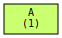

In [ ]:
import torchviz

# Please run this in PyTorch >= 1.9
torchviz.make_dot(A, params={'A': A, 'B': B},show_attrs=True)

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
> scaled = A * x
  y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

Note that MulBackward0 saves the tensor `x` as the "other" tensor.




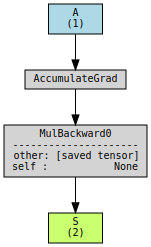

In [ ]:
torchviz.make_dot(scaled, params={'A': A, 'S':scaled , 'X':x},show_attrs=True)

What is this AccumulateGrad Node?

Every leaf Tensor that requires gradient gets an AccumulateGrad Node associated with it. That Node is used to link back to the Tensor and know on which Tensor the gradients should be accumulated.
Note that the AccumulateGrad Nodes are the *only* Nodes that do not have parents pointing to them.

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
> y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

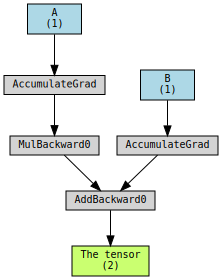

In [ ]:
torchviz.make_dot(y, params={'A': A, 'B': B,'s':scaled,'The tensor':y})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
> diff = y - t
  sqdiff = diff ** 2
  loss = sqdiff.sum()
```

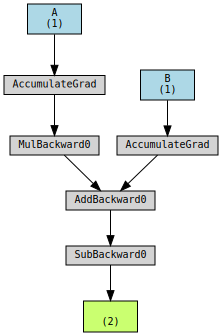

In [ ]:
torchviz.make_dot(diff, params={'A': A, 'B': B})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
  diff = y - t
> sqdiff = diff ** 2
  loss = sqdiff.sum()
```
Note that `self` being saved by PowBackward is `diff`

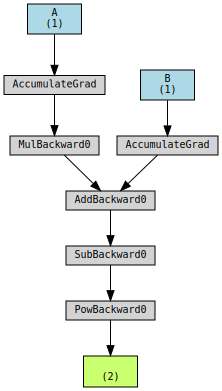

In [ ]:
torchviz.make_dot(sqdiff, params={'A': A, 'B': B})

```
  import torch
  x = torch.tensor([1., 2.])
  t = torch.tensor([5., 7.])
  A = torch.tensor([3.], requires_grad=True)
  B = torch.tensor([5.], requires_grad=True)
 
  # Forward
  scaled = A * x
  y= scaled + B
  diff = y - t
  sqdiff = diff ** 2
> loss = sqdiff.sum()
```

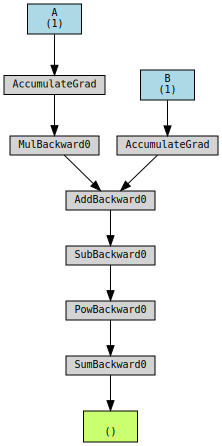

In [ ]:
torchviz.make_dot(loss, params={'A': A, 'B': B, 'x': x, 'diff': diff})

`loss.backward()` invokes a series of operations on this graph. In Pseudocode:
```
grad_sqdiff = SumBackward(sqdiff.shape).apply(1.)
grad_diff = PowBackward(base: diff, power: 2).apply(grad_sqdiff)
grad_y = SubBackward().apply(grad_diff)
grad_scaled, grad_B = AddBackward().apply(grad_y)
grad_A = MulBackward(other: X).apply(grad_scaled)
```
`SumBackward(input_shape).apply(grad)` is `grad.expand(input_shape)`.

`PowBackward(base, power).apply(grad)` is `grad * power * base ** (power - 1)`. 

And so on...


In [ ]:
grad_sqdiff = torch.tensor(1.).expand(sqdiff.shape)
grad_diff = grad_sqdiff * 2 * diff
grad_y = grad_diff
grad_scaled, grad_B = grad_y, grad_y.sum()
grad_A = (grad_scaled * x).sum()

There are two things to discuss here:

* How exactly are the grad formula derived?
    * See below
* Where does the sum() come from?
    * Chain rule! Remember how we were summing over each i in the numeric walkthrough.



# So, how are these grad formulas derived?

TL;DR: Each backward formula captures one of the multiplications in the chain rule.

Let’s say we were doing `out = torch.pow(in, p)`, somewhere in our model and we output a scalar loss. Then:

$$\frac{\partial loss}{\partial in_j} = \sum_i \frac{\partial loss}{\partial out_i} * \frac{\partial out_i}{\partial in_j} $$

But wait! pow is a pointwise operation, so `out[i]` does not depend on `in[j]` unless `i == j`.

$$\frac{\partial loss}{\partial in_j} = \frac{\partial loss}{\partial out_j} * \frac{\partial out_j}{\partial in_j} $$

$$\frac{\partial loss}{\partial in_j} = \frac{\partial loss}{\partial out_j} * p * in_j^{p-1} $$

Writing this in a vectorized form we get `grad_input = grad_output * p * in ** (p-1)`.

You will see detailed examples on how to derive these formulas in the next section.

# What about these saved Tensors that might be needed for backward?

Autograd will automatically save all the required data to be able to compute the backward pass.

You can actually see these saved properties here:

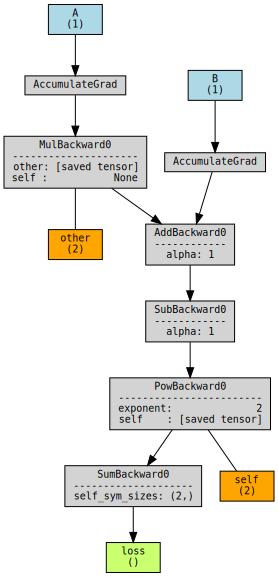

In [ ]:
torchviz.make_dot(loss, params={'A': A, 'B': B, 'x': x, 'diff': diff,'loss':loss}, show_attrs=True, show_saved=True)

<div dir="rtl" lang="he" xml:lang="he">
